In [2]:
import numpy as np
import scipy
import seaborn as sns
import sklearn
import pandas as pd
# Useful for saving our models.
import pickle


# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
import warnings
# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


print('Finished successfully loading packages')


Finished successfully loading packages


## Question 1

In [94]:
df = pd.read_csv('diabetes.csv')

In [96]:
df_encoded = pd.get_dummies(df, columns=['Zodiac'], prefix='Zodiac', drop_first=True)
X = df_encoded.iloc[:, 1:]
y = df_encoded['Diabetes']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))

fullModelScore = roc_auc_score(y_test, y_pred)
print(fullModelScore)


Accuracy = 86.3%
0.5688214802979461


In [98]:
diabetesPredictors = ['HighBP','HighChol','BMI','Smoker','Stroke','Myocardial','PhysActivity','Fruit','Vegetables','HeavyDrinker',
                      'HasHealthcare','NotAbleToAffordDoctor','GeneralHealth','MentalHealth','PhysicalHealth','HardToClimbStairs','BiologicalSex',
                     'AgeBracket','EducationBracket','IncomeBracket','Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8',
                     'Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']

scoreList = {}
accuracyList = {}

for predictor in diabetesPredictors[:]:  # Use [:] to iterate over a copy
    print("Omitting", predictor)
    newList = [p for p in diabetesPredictors if p != predictor]
    X = df_encoded[newList]
    y = df_encoded['Diabetes']
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracyList[predictor] = accuracy
    print("Accuracy = {:0.1f}%".format(accuracy * 100))
    auc_score = roc_auc_score(y_test, y_pred)
    scoreList[predictor] = auc_score
    print(auc_score)


print("Omitting Zodiac")
X = df_encoded[diabetesPredictors[0:20]]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

Omitting HighBP
Accuracy = 86.1%
0.5605919350191818
Omitting HighChol
Accuracy = 86.1%
0.5595157439838985
Omitting BMI
Accuracy = 85.9%
0.5523275141821349
Omitting Smoker
Accuracy = 86.3%
0.5687976797844826
Omitting Stroke
Accuracy = 86.3%
0.5682437969115248
Omitting Myocardial
Accuracy = 86.2%
0.5654468685796661
Omitting PhysActivity
Accuracy = 86.2%
0.5675512370173496
Omitting Fruit
Accuracy = 86.2%
0.5673538839243861
Omitting Vegetables
Accuracy = 86.3%
0.5686019771153443
Omitting HeavyDrinker
Accuracy = 86.2%
0.5657808356640658
Omitting HasHealthcare
Accuracy = 86.3%
0.5680468564245177
Omitting NotAbleToAffordDoctor
Accuracy = 86.3%
0.5688210676919898
Omitting GeneralHealth
Accuracy = 86.1%
0.5549098252868666
Omitting MentalHealth
Accuracy = 86.3%
0.5679549552183144
Omitting PhysicalHealth
Accuracy = 86.2%
0.5665562847494068
Omitting HardToClimbStairs
Accuracy = 86.2%
0.5663248813100733
Omitting BiologicalSex
Accuracy = 86.2%
0.5664524832864718
Omitting AgeBracket
Accuracy = 86.2%


In [99]:
scoreList.pop("Zodiac_2")
scoreList.pop("Zodiac_3")
scoreList.pop("Zodiac_4")
scoreList.pop("Zodiac_5")
scoreList.pop("Zodiac_6")
scoreList.pop("Zodiac_7")
scoreList.pop("Zodiac_8")
scoreList.pop("Zodiac_9")
scoreList.pop("Zodiac_10")
scoreList.pop("Zodiac_11")
scoreList.pop("Zodiac_12")
print(scoreList)
minKey = min(scoreList, key = scoreList.get)
print(minKey)
print(scoreList[minKey])

{'HighBP': 0.5605919350191818, 'HighChol': 0.5595157439838985, 'BMI': 0.5523275141821349, 'Smoker': 0.5687976797844826, 'Stroke': 0.5682437969115248, 'Myocardial': 0.5654468685796661, 'PhysActivity': 0.5675512370173496, 'Fruit': 0.5673538839243861, 'Vegetables': 0.5686019771153443, 'HeavyDrinker': 0.5657808356640658, 'HasHealthcare': 0.5680468564245177, 'NotAbleToAffordDoctor': 0.5688210676919898, 'GeneralHealth': 0.5549098252868666, 'MentalHealth': 0.5679549552183144, 'PhysicalHealth': 0.5665562847494068, 'HardToClimbStairs': 0.5663248813100733, 'BiologicalSex': 0.5664524832864718, 'AgeBracket': 0.5659076124285516, 'EducationBracket': 0.5681510704934091, 'IncomeBracket': 0.5671105802283208}
BMI
0.5523275141821349


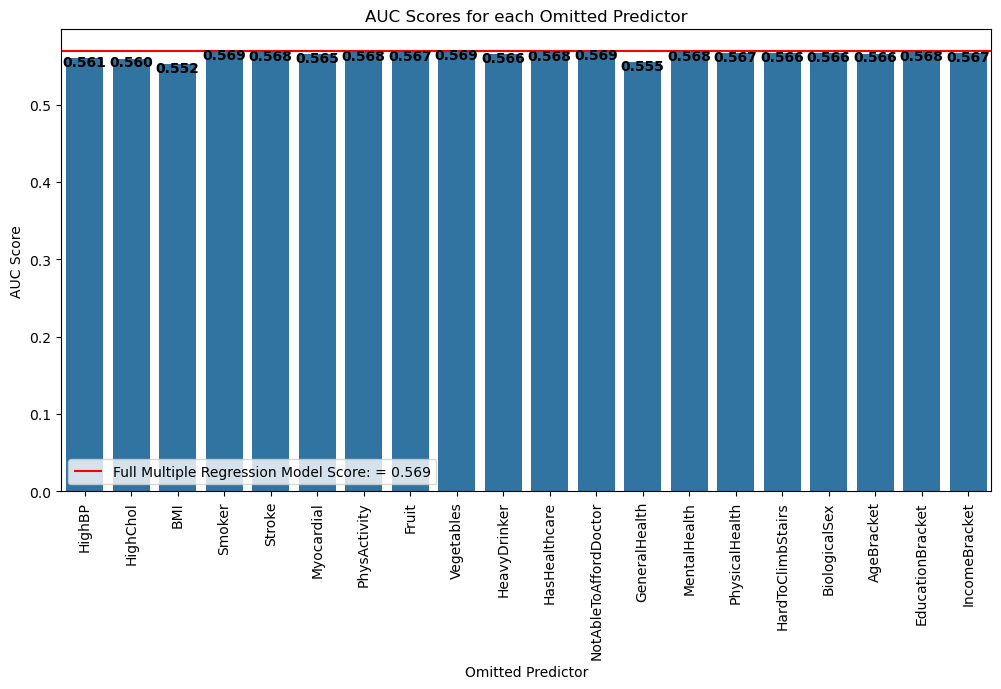

In [100]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('AUC Score')
plt.hlines(y=fullModelScore, xmin = -0.5, xmax = 19.5, color='red', label = ("Full Multiple Regression Model Score: = {:0.3f}".format(fullModelScore)))

plt.title("AUC Scores for each Omitted Predictor")

ax = sns.barplot(x=list(scoreList.keys()), y=list(scoreList.values()), color='darkblue')

for i, v in enumerate(scoreList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(scoreList)
plt.legend()
plt.show()

In [101]:
accuracyList.pop("Zodiac_2")
accuracyList.pop("Zodiac_3")
accuracyList.pop("Zodiac_4")
accuracyList.pop("Zodiac_5")
accuracyList.pop("Zodiac_6")
accuracyList.pop("Zodiac_7")
accuracyList.pop("Zodiac_8")
accuracyList.pop("Zodiac_9")
accuracyList.pop("Zodiac_10")
accuracyList.pop("Zodiac_11")
accuracyList.pop("Zodiac_12")
print(accuracyList)
minKey = min(accuracyList, key = accuracyList.get)
print(minKey)
print(accuracyList[minKey])

{'HighBP': 0.8608877325764743, 'HighChol': 0.8609271523178808, 'BMI': 0.8589167455061495, 'Smoker': 0.8630558183538316, 'Stroke': 0.8627010406811731, 'Myocardial': 0.8619717754651529, 'PhysActivity': 0.8623068432671082, 'Fruit': 0.8624645222327342, 'Vegetables': 0.8628192999053926, 'HeavyDrinker': 0.8623462630085147, 'HasHealthcare': 0.8627601702932829, 'NotAbleToAffordDoctor': 0.8629966887417219, 'GeneralHealth': 0.8611636707663197, 'MentalHealth': 0.8626024913276569, 'PhysicalHealth': 0.862287133396405, 'HardToClimbStairs': 0.862287133396405, 'BiologicalSex': 0.8622082939135919, 'AgeBracket': 0.8624645222327342, 'EducationBracket': 0.8627404604225797, 'IncomeBracket': 0.8625433617155471}
BMI
0.8589167455061495


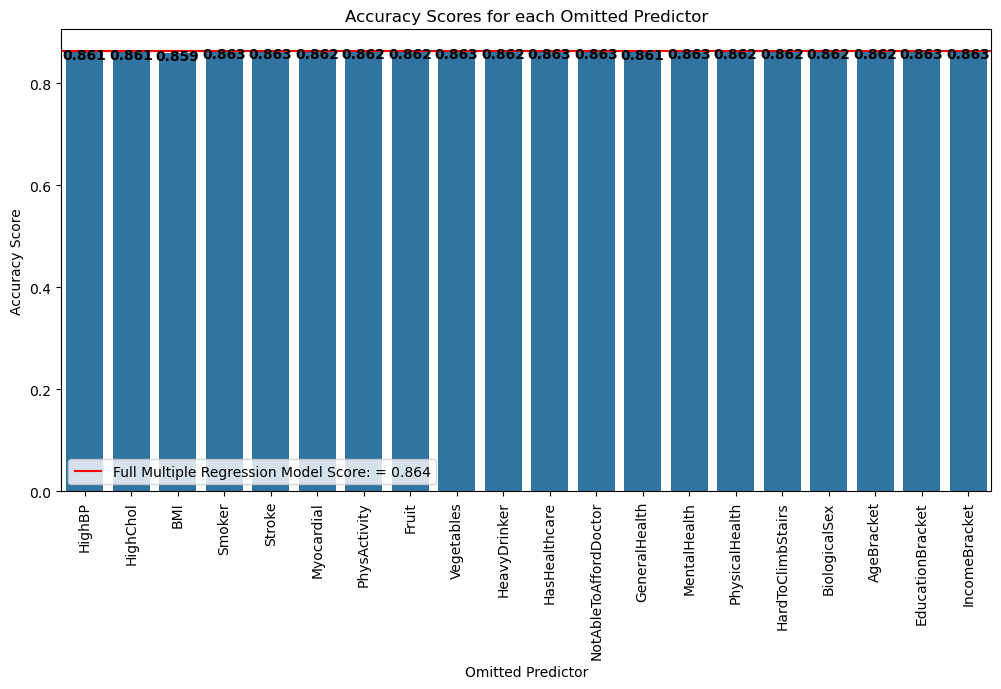

In [108]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('Accuracy Score')
plt.hlines(y=fullModelAccuracy, xmin = -0.5, xmax = 19.5, color='red', label = ("Full Multiple Regression Model Score: = {:0.3f}".format(fullModelAccuracy)))
plt.title("Accuracy Scores for each Omitted Predictor")

ax = sns.barplot(x=list(accuracyList.keys()), y=list(accuracyList.values()), color='darkblue')

for i, v in enumerate(accuracyList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(accuracyList)
plt.legend()
plt.show()

## Question 2

In [122]:
diabetesPredictors = ['HighBP','HighChol','BMI','Smoker','Stroke','Myocardial','PhysActivity','Fruit','Vegetables','HeavyDrinker',
                      'HasHealthcare','NotAbleToAffordDoctor','GeneralHealth','MentalHealth','PhysicalHealth','HardToClimbStairs','BiologicalSex',
                     'AgeBracket','EducationBracket','IncomeBracket','Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8',
                     'Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']
X = df_encoded.iloc[:, 1:]
y = df_encoded['Diabetes']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
svm = LinearSVC(C = 1e10, dual = False)
svm.fit(X_train, y_train)
    
y_pred = svm.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))

fullModelScore = roc_auc_score(y_test, y_pred)
print(fullModelScore)

Accuracy = 86.1%
0.5287156986450355


In [123]:
diabetesPredictors = ['HighBP','HighChol','BMI','Smoker','Stroke','Myocardial','PhysActivity','Fruit','Vegetables','HeavyDrinker',
                      'HasHealthcare','NotAbleToAffordDoctor','GeneralHealth','MentalHealth','PhysicalHealth','HardToClimbStairs','BiologicalSex',
                     'AgeBracket','EducationBracket','IncomeBracket','Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8',
                     'Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']

scoreList = {}
accuracyList = {}

for predictor in diabetesPredictors[:]:  # Use [:] to iterate over a copy
    print("Omitting", predictor)
    newList = [p for p in diabetesPredictors if p != predictor]
    X = df_encoded[newList]
    y = df_encoded['Diabetes']
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
    svm = LinearSVC(C = 1e10, dual = False)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracyList[predictor] = accuracy
    print("Accuracy = {:0.3f}%".format(accuracy * 100))

    auc_score = roc_auc_score(y_test, y_pred)
    scoreList[predictor] = auc_score
    print(auc_score)

print("Omitting Zodiac")
X = df_encoded[diabetesPredictors[0:20]]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
svm = LinearSVC(C = 1e10, dual = False)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

Omitting HighBP
Accuracy = 86.144%
0.5282056215680418
Omitting HighChol
Accuracy = 86.412%
0.5255826658924757
Omitting BMI
Accuracy = 86.319%
0.5159102497628438
Omitting Smoker
Accuracy = 86.351%
0.5297941389024196
Omitting Stroke
Accuracy = 86.300%
0.5302590767856022
Omitting Myocardial
Accuracy = 86.396%
0.5286677065054007
Omitting PhysActivity
Accuracy = 86.219%
0.5280446708797807
Omitting Fruit
Accuracy = 86.118%
0.5297085738620662
Omitting Vegetables
Accuracy = 86.495%
0.5312453783640688
Omitting HeavyDrinker
Accuracy = 86.404%
0.5292371831253029
Omitting HasHealthcare
Accuracy = 86.404%
0.529256779288024
Omitting NotAbleToAffordDoctor
Accuracy = 86.231%
0.5292764872619421
Omitting GeneralHealth
Accuracy = 85.892%
0.5247794421188974
Omitting MentalHealth
Accuracy = 86.306%
0.5305968288281383
Omitting PhysicalHealth
Accuracy = 86.209%
0.5303347559394742
Omitting HardToClimbStairs
Accuracy = 86.359%
0.5262187408985399
Omitting BiologicalSex
Accuracy = 86.294%
0.5275467979225577
Omit

In [124]:
scoreList.pop("Zodiac_2")
scoreList.pop("Zodiac_3")
scoreList.pop("Zodiac_4")
scoreList.pop("Zodiac_5")
scoreList.pop("Zodiac_6")
scoreList.pop("Zodiac_7")
scoreList.pop("Zodiac_8")
scoreList.pop("Zodiac_9")
scoreList.pop("Zodiac_10")
scoreList.pop("Zodiac_11")
scoreList.pop("Zodiac_12")
print(scoreList)
minKey = min(scoreList, key = scoreList.get)
print(minKey)
print(scoreList[minKey])

{'HighBP': 0.5282056215680418, 'HighChol': 0.5255826658924757, 'BMI': 0.5159102497628438, 'Smoker': 0.5297941389024196, 'Stroke': 0.5302590767856022, 'Myocardial': 0.5286677065054007, 'PhysActivity': 0.5280446708797807, 'Fruit': 0.5297085738620662, 'Vegetables': 0.5312453783640688, 'HeavyDrinker': 0.5292371831253029, 'HasHealthcare': 0.529256779288024, 'NotAbleToAffordDoctor': 0.5292764872619421, 'GeneralHealth': 0.5247794421188974, 'MentalHealth': 0.5305968288281383, 'PhysicalHealth': 0.5303347559394742, 'HardToClimbStairs': 0.5262187408985399, 'BiologicalSex': 0.5275467979225577, 'AgeBracket': 0.528436707424096, 'EducationBracket': 0.5291677546522717, 'IncomeBracket': 0.5298188380013589}
BMI
0.5159102497628438


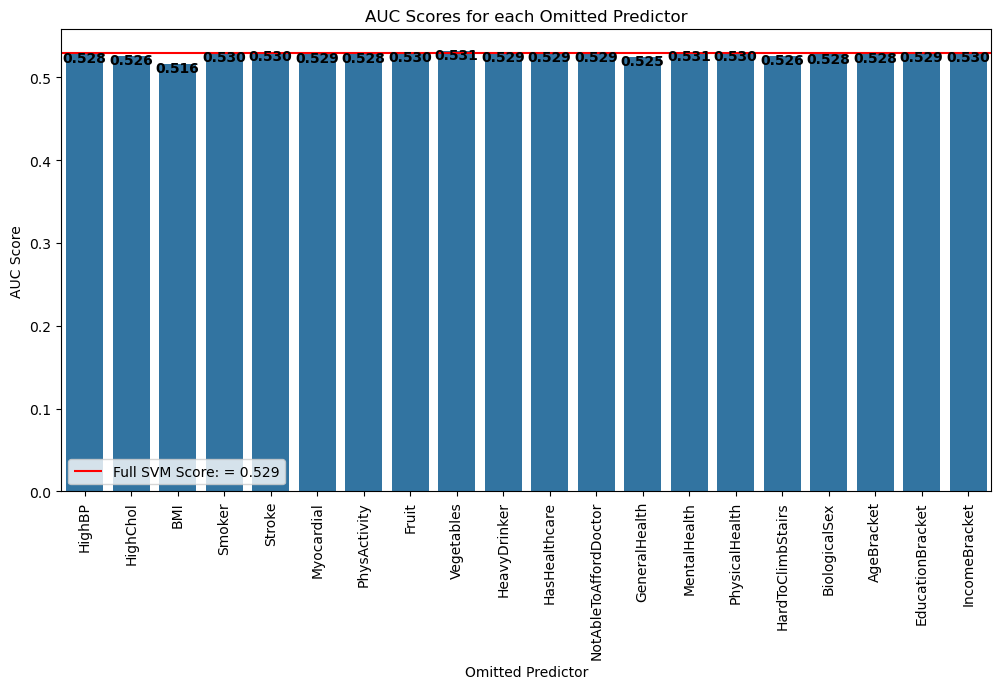

In [125]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('AUC Score')
plt.hlines(y=fullModelScore, xmin = -0.5, xmax = 19.5, color='red', label = ("Full SVM Score: = {:0.3f}".format(fullModelScore)))
plt.title("AUC Scores for each Omitted Predictor")

ax = sns.barplot(x=list(scoreList.keys()), y=list(scoreList.values()), color='darkblue')

for i, v in enumerate(scoreList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(scoreList)
plt.legend()
plt.show()

In [126]:
accuracyList.pop("Zodiac_2")
accuracyList.pop("Zodiac_3")
accuracyList.pop("Zodiac_4")
accuracyList.pop("Zodiac_5")
accuracyList.pop("Zodiac_6")
accuracyList.pop("Zodiac_7")
accuracyList.pop("Zodiac_8")
accuracyList.pop("Zodiac_9")
accuracyList.pop("Zodiac_10")
accuracyList.pop("Zodiac_11")
accuracyList.pop("Zodiac_12")
print(accuracyList)
minKey = min(accuracyList, key = accuracyList.get)
print(minKey)
print(accuracyList[minKey])

{'HighBP': 0.8614396089561652, 'HighChol': 0.864120151371807, 'BMI': 0.8631937874487543, 'Smoker': 0.8635091453800063, 'Stroke': 0.8629966887417219, 'Myocardial': 0.8639624724061811, 'PhysActivity': 0.8621885840428887, 'Fruit': 0.861183380637023, 'Vegetables': 0.8649479659413434, 'HeavyDrinker': 0.864041311888994, 'HasHealthcare': 0.864041311888994, 'NotAbleToAffordDoctor': 0.8623068432671082, 'GeneralHealth': 0.8589167455061495, 'MentalHealth': 0.8630558183538316, 'PhysicalHealth': 0.8620900346893724, 'HardToClimbStairs': 0.8635879848628193, 'BiologicalSex': 0.8629375591296121, 'AgeBracket': 0.861183380637023, 'EducationBracket': 0.8646326080100915, 'IncomeBracket': 0.8630755282245348}
GeneralHealth
0.8589167455061495


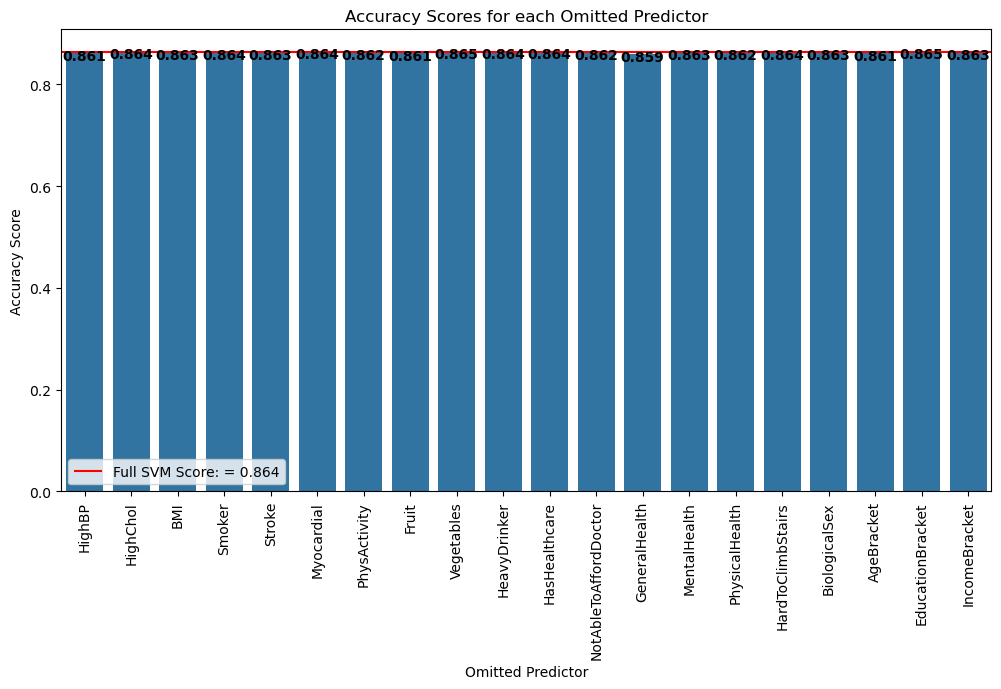

In [128]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('Accuracy Score')
plt.hlines(y=fullModelAccuracy, xmin = -0.5, xmax = 19.5, color='red', label = ("Full SVM Score: = {:0.3f}".format(fullModelAccuracy)))
plt.title("Accuracy Scores for each Omitted Predictor")

ax = sns.barplot(x=list(accuracyList.keys()), y=list(accuracyList.values()), color='darkblue')

for i, v in enumerate(accuracyList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(accuracyList)
plt.legend()
plt.show()

## Question 3

In [134]:
X = df_encoded.iloc[:, 1:]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

fullModelAccuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))

fullModelScore = roc_auc_score(y_test, y_pred)
print(fullModelScore)

Accuracy = 86.1%
0.5998588692057873


In [135]:
diabetesPredictors = ['HighBP','HighChol','BMI','Smoker','Stroke','Myocardial','PhysActivity','Fruit','Vegetables','HeavyDrinker',
                      'HasHealthcare','NotAbleToAffordDoctor','GeneralHealth','MentalHealth','PhysicalHealth','HardToClimbStairs','BiologicalSex',
                     'AgeBracket','EducationBracket','IncomeBracket','Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8',
                     'Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']

scoreList = {}
accuracyList = {}

for predictor in diabetesPredictors[:]:  # Use [:] to iterate over a copy
    print("Omitting", predictor)
    newList = [p for p in diabetesPredictors if p != predictor]
    X = df_encoded[newList]
    y = df_encoded['Diabetes']
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
    clf = tree.DecisionTreeClassifier(criterion='gini')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracyList[predictor] = accuracy
    print("Accuracy = {:0.3f}%".format(accuracy * 100))

    auc_score = roc_auc_score(y_test, y_pred)
    scoreList[predictor] = auc_score
    print(auc_score)

print("Omitting Zodiac")
X = df_encoded[diabetesPredictors[0:20]]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

Omitting HighBP
Accuracy = 79.216%
0.5909367507735171
Omitting HighChol
Accuracy = 79.380%
0.5941531019340645
Omitting BMI
Accuracy = 79.372%
0.5890064554939083
Omitting Smoker
Accuracy = 79.240%
0.5949158782106347
Omitting Stroke
Accuracy = 79.350%
0.5937065912526638
Omitting Myocardial
Accuracy = 79.372%
0.595638853448033
Omitting PhysActivity
Accuracy = 79.391%
0.5951142617228222
Omitting Fruit
Accuracy = 79.884%
0.5998938517294045
Omitting Vegetables
Accuracy = 79.614%
0.6012618394154088
Omitting HeavyDrinker
Accuracy = 79.421%
0.5921745804536995
Omitting HasHealthcare
Accuracy = 79.397%
0.5960427939027724
Omitting NotAbleToAffordDoctor
Accuracy = 79.606%
0.5978177377159751
Omitting GeneralHealth
Accuracy = 79.044%
0.5909412180584989
Omitting MentalHealth
Accuracy = 79.539%
0.5956297942559333
Omitting PhysicalHealth
Accuracy = 79.389%
0.5944078465434073
Omitting HardToClimbStairs
Accuracy = 79.590%
0.5976481637641692
Omitting BiologicalSex
Accuracy = 79.571%
0.5963207310482296
Omit

In [136]:
scoreList.pop("Zodiac_2")
scoreList.pop("Zodiac_3")
scoreList.pop("Zodiac_4")
scoreList.pop("Zodiac_5")
scoreList.pop("Zodiac_6")
scoreList.pop("Zodiac_7")
scoreList.pop("Zodiac_8")
scoreList.pop("Zodiac_9")
scoreList.pop("Zodiac_10")
scoreList.pop("Zodiac_11")
scoreList.pop("Zodiac_12")
print(scoreList)
minKey = min(scoreList, key = scoreList.get)
print(minKey)
print(scoreList[minKey])

{'HighBP': 0.5909367507735171, 'HighChol': 0.5941531019340645, 'BMI': 0.5890064554939083, 'Smoker': 0.5949158782106347, 'Stroke': 0.5937065912526638, 'Myocardial': 0.595638853448033, 'PhysActivity': 0.5951142617228222, 'Fruit': 0.5998938517294045, 'Vegetables': 0.6012618394154088, 'HeavyDrinker': 0.5921745804536995, 'HasHealthcare': 0.5960427939027724, 'NotAbleToAffordDoctor': 0.5978177377159751, 'GeneralHealth': 0.5909412180584989, 'MentalHealth': 0.5956297942559333, 'PhysicalHealth': 0.5944078465434073, 'HardToClimbStairs': 0.5976481637641692, 'BiologicalSex': 0.5963207310482296, 'AgeBracket': 0.5962156530988553, 'EducationBracket': 0.5968121330482019, 'IncomeBracket': 0.5973600137221948}
BMI
0.5890064554939083


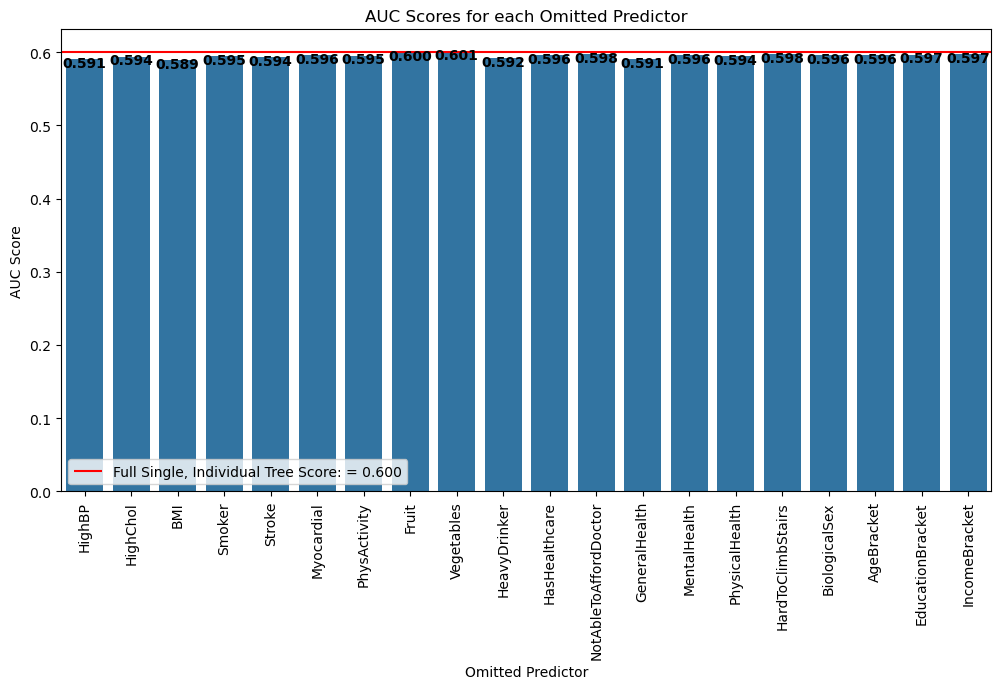

In [138]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('AUC Score')
plt.hlines(y=fullModelScore, xmin = -0.5, xmax = 19.5, color='red', label = ("Full Single, Individual Tree Score: = {:0.3f}".format(fullModelScore)))
plt.title("AUC Scores for each Omitted Predictor")

ax = sns.barplot(x=list(scoreList.keys()), y=list(scoreList.values()), color='darkblue')

for i, v in enumerate(scoreList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(scoreList)
plt.legend()
plt.show()

In [139]:
accuracyList.pop("Zodiac_2")
accuracyList.pop("Zodiac_3")
accuracyList.pop("Zodiac_4")
accuracyList.pop("Zodiac_5")
accuracyList.pop("Zodiac_6")
accuracyList.pop("Zodiac_7")
accuracyList.pop("Zodiac_8")
accuracyList.pop("Zodiac_9")
accuracyList.pop("Zodiac_10")
accuracyList.pop("Zodiac_11")
accuracyList.pop("Zodiac_12")
print(accuracyList)
minKey = min(accuracyList, key = accuracyList.get)
print(minKey)
print(accuracyList[minKey])

{'HighBP': 0.7921594134342479, 'HighChol': 0.7937953327026175, 'BMI': 0.7937164932198045, 'Smoker': 0.7923959318826869, 'Stroke': 0.7934996846420688, 'Myocardial': 0.7937164932198045, 'PhysActivity': 0.793913591926837, 'Fruit': 0.7988410596026491, 'Vegetables': 0.796140807316304, 'HeavyDrinker': 0.7942092399873857, 'HasHealthcare': 0.7939727215389467, 'NotAbleToAffordDoctor': 0.796061967833491, 'GeneralHealth': 0.7904446546830652, 'MentalHealth': 0.7953918322295805, 'PhysicalHealth': 0.7938938820561338, 'HardToClimbStairs': 0.795904288867865, 'BiologicalSex': 0.7957071901608326, 'AgeBracket': 0.796692683695995, 'EducationBracket': 0.796535004730369, 'IncomeBracket': 0.7943274992116052}
GeneralHealth
0.7904446546830652


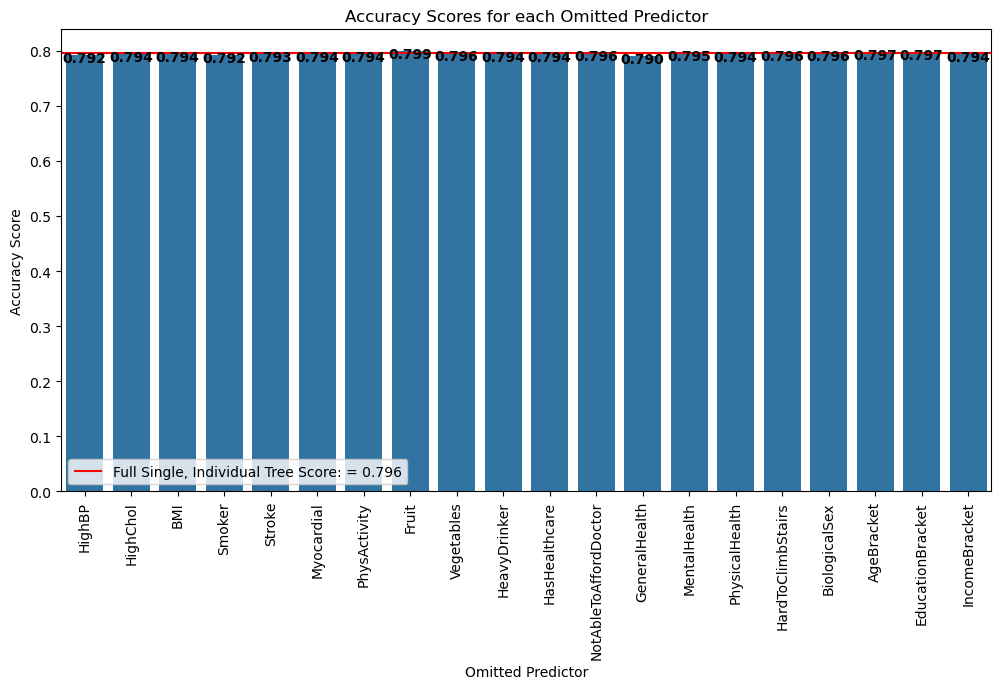

In [140]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('Accuracy Score')
plt.hlines(y=fullModelAccuracy, xmin = -0.5, xmax = 19.5, color='red', label = ("Full Single, Individual Tree Score: = {:0.3f}".format(fullModelAccuracy)))
plt.title("Accuracy Scores for each Omitted Predictor")

ax = sns.barplot(x=list(accuracyList.keys()), y=list(accuracyList.values()), color='darkblue')

for i, v in enumerate(accuracyList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(accuracyList)
plt.legend()
plt.show()

## Question 4

In [146]:
X = df_encoded.iloc[:, 1:]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
clf = RandomForestClassifier(n_estimators=100, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

fullModelAccuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))

fullModelScore = roc_auc_score(y_test, y_pred)
print(fullModelScore)

Accuracy = 79.5%
0.5679673279851061


In [147]:
diabetesPredictors = ['HighBP','HighChol','BMI','Smoker','Stroke','Myocardial','PhysActivity','Fruit','Vegetables','HeavyDrinker',
                      'HasHealthcare','NotAbleToAffordDoctor','GeneralHealth','MentalHealth','PhysicalHealth','HardToClimbStairs','BiologicalSex',
                     'AgeBracket','EducationBracket','IncomeBracket','Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8',
                     'Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']

scoreList = {}
accuracyList = {}

for predictor in diabetesPredictors[:]:  # Use [:] to iterate over a copy
    print("Omitting", predictor)
    newList = [p for p in diabetesPredictors if p != predictor]
    X = df_encoded[newList]
    y = df_encoded['Diabetes']
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
    clf = RandomForestClassifier(n_estimators=100, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracyList[predictor] = accuracy
    print("Accuracy = {:0.3f}%".format(accuracy * 100))

    auc_score = roc_auc_score(y_test, y_pred)
    scoreList[predictor] = auc_score
    print(auc_score)

print("Omitting Zodiac")
X = df_encoded[diabetesPredictors[0:20]]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(n_estimators=100, max_samples=0.1, max_features=0.5,bootstrap=True, criterion='gini')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

Omitting HighBP
Accuracy = 86.428%
0.5568168860840476
Omitting HighChol
Accuracy = 86.402%
0.5582237322301009
Omitting BMI
Accuracy = 86.260%
0.545372582007998
Omitting Smoker
Accuracy = 86.501%
0.5634036250080832
Omitting Stroke
Accuracy = 86.416%
0.5636684486702271
Omitting Myocardial
Accuracy = 86.300%
0.5630057006614368
Omitting PhysActivity
Accuracy = 86.605%
0.569525046532213
Omitting Fruit
Accuracy = 86.270%
0.563357925916947
Omitting Vegetables
Accuracy = 86.532%
0.5660161036396405
Omitting HeavyDrinker
Accuracy = 86.585%
0.5681796751642257
Omitting HasHealthcare
Accuracy = 86.449%
0.5659599568196405
Omitting NotAbleToAffordDoctor
Accuracy = 86.757%
0.5685513841086172
Omitting GeneralHealth
Accuracy = 86.463%
0.5574748203809303
Omitting MentalHealth
Accuracy = 86.741%
0.5682846423043023
Omitting PhysicalHealth
Accuracy = 86.536%
0.5678297590509721
Omitting HardToClimbStairs
Accuracy = 86.493%
0.5658204954485326
Omitting BiologicalSex
Accuracy = 86.377%
0.5626673425780568
Omitti

In [148]:
scoreList.pop("Zodiac_2")
scoreList.pop("Zodiac_3")
scoreList.pop("Zodiac_4")
scoreList.pop("Zodiac_5")
scoreList.pop("Zodiac_6")
scoreList.pop("Zodiac_7")
scoreList.pop("Zodiac_8")
scoreList.pop("Zodiac_9")
scoreList.pop("Zodiac_10")
scoreList.pop("Zodiac_11")
scoreList.pop("Zodiac_12")
print(scoreList)
minKey = min(scoreList, key = scoreList.get)
print(minKey)
print(scoreList[minKey])

{'HighBP': 0.5568168860840476, 'HighChol': 0.5582237322301009, 'BMI': 0.545372582007998, 'Smoker': 0.5634036250080832, 'Stroke': 0.5636684486702271, 'Myocardial': 0.5630057006614368, 'PhysActivity': 0.569525046532213, 'Fruit': 0.563357925916947, 'Vegetables': 0.5660161036396405, 'HeavyDrinker': 0.5681796751642257, 'HasHealthcare': 0.5659599568196405, 'NotAbleToAffordDoctor': 0.5685513841086172, 'GeneralHealth': 0.5574748203809303, 'MentalHealth': 0.5682846423043023, 'PhysicalHealth': 0.5678297590509721, 'HardToClimbStairs': 0.5658204954485326, 'BiologicalSex': 0.5626673425780568, 'AgeBracket': 0.5597724419559167, 'EducationBracket': 0.5667675657628901, 'IncomeBracket': 0.5658662055751874}
BMI
0.545372582007998


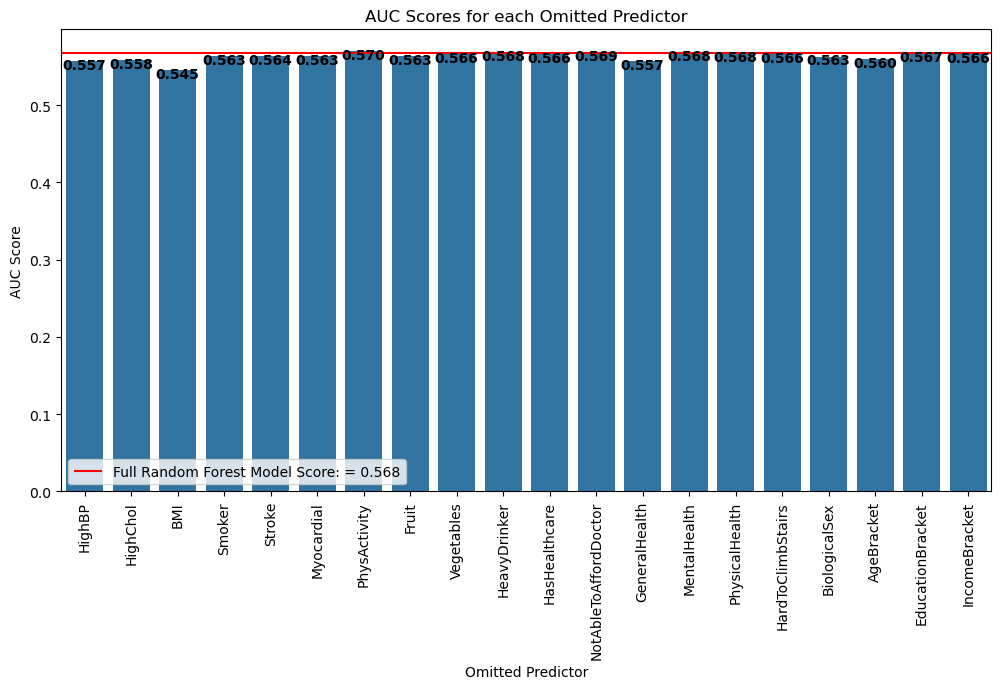

In [149]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('AUC Score')
plt.hlines(y=fullModelScore, xmin = -0.5, xmax = 19.5, color='red', label = ("Full Random Forest Model Score: = {:0.3f}".format(fullModelScore)))
plt.title("AUC Scores for each Omitted Predictor")

ax = sns.barplot(x=list(scoreList.keys()), y=list(scoreList.values()), color='darkblue')

for i, v in enumerate(scoreList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(scoreList)
plt.legend()
plt.show()

In [150]:
accuracyList.pop("Zodiac_2")
accuracyList.pop("Zodiac_3")
accuracyList.pop("Zodiac_4")
accuracyList.pop("Zodiac_5")
accuracyList.pop("Zodiac_6")
accuracyList.pop("Zodiac_7")
accuracyList.pop("Zodiac_8")
accuracyList.pop("Zodiac_9")
accuracyList.pop("Zodiac_10")
accuracyList.pop("Zodiac_11")
accuracyList.pop("Zodiac_12")
print(accuracyList)
minKey = min(accuracyList, key = accuracyList.get)
print(minKey)
print(accuracyList[minKey])

{'HighBP': 0.864277830337433, 'HighChol': 0.8640216020182908, 'BMI': 0.8626024913276569, 'Smoker': 0.8650070955534531, 'Stroke': 0.8641595711132135, 'Myocardial': 0.8629966887417219, 'PhysActivity': 0.8660517187007253, 'Fruit': 0.8627010406811731, 'Vegetables': 0.8653224534847052, 'HeavyDrinker': 0.8658546199936928, 'HasHealthcare': 0.8644946389151688, 'NotAbleToAffordDoctor': 0.8675693787448754, 'GeneralHealth': 0.8646326080100915, 'MentalHealth': 0.8674116997792495, 'PhysicalHealth': 0.8653618732261117, 'HardToClimbStairs': 0.8649282560706402, 'BiologicalSex': 0.8637653736991485, 'AgeBracket': 0.8653815830968149, 'EducationBracket': 0.8654012929675181, 'IncomeBracket': 0.8647311573636077}
BMI
0.8626024913276569


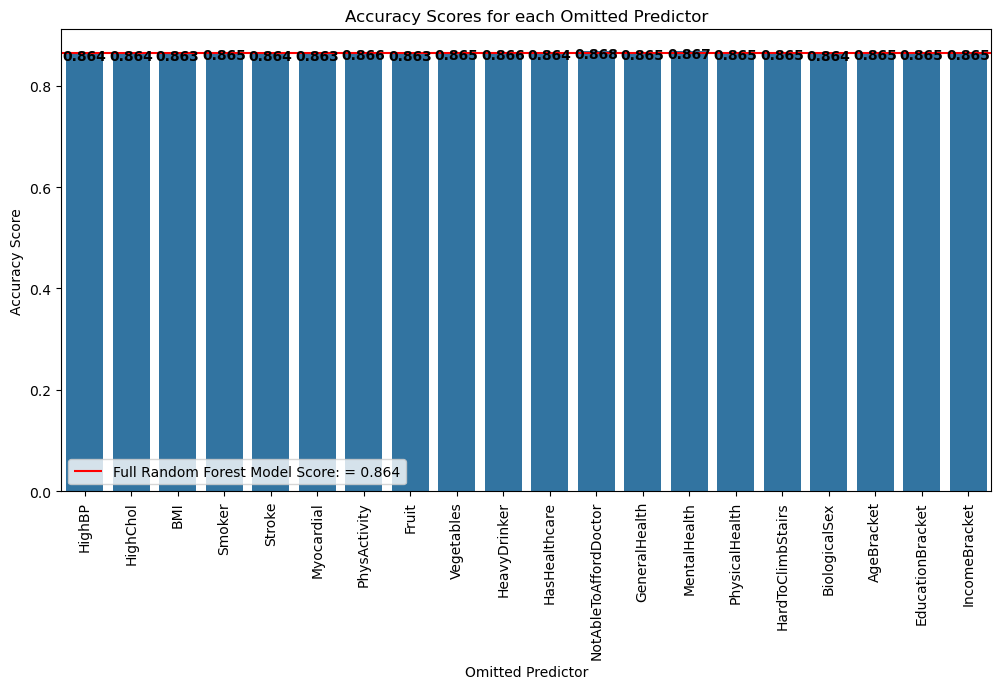

In [151]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('Accuracy Score')
plt.hlines(y=fullModelAccuracy, xmin = -0.5, xmax = 19.5, color='red', label = ("Full Random Forest Model Score: = {:0.3f}".format(fullModelAccuracy)))
plt.title("Accuracy Scores for each Omitted Predictor")

ax = sns.barplot(x=list(accuracyList.keys()), y=list(accuracyList.values()), color='darkblue')

for i, v in enumerate(accuracyList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(accuracyList)
plt.legend()
plt.show()

## Question 5

In [159]:
X = df_encoded.iloc[:, 1:]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100, learning_rate=1
)
bdt.fit(X_train, y_train)

y_pred = bdt.predict(X_test)

fullModelAccuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))

fullModelScore = roc_auc_score(y_test, y_pred)
print(fullModelScore)

Accuracy = 86.4%
0.5807901673702364


In [160]:
diabetesPredictors = ['HighBP','HighChol','BMI','Smoker','Stroke','Myocardial','PhysActivity','Fruit','Vegetables','HeavyDrinker',
                      'HasHealthcare','NotAbleToAffordDoctor','GeneralHealth','MentalHealth','PhysicalHealth','HardToClimbStairs','BiologicalSex',
                     'AgeBracket','EducationBracket','IncomeBracket','Zodiac_2','Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8',
                     'Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']
scoreList = {}
accuracyList = {}

for predictor in diabetesPredictors[:]:  # Use [:] to iterate over a copy
    print("Omitting", predictor)
    newList = [p for p in diabetesPredictors if p != predictor]
    X = df_encoded[newList]
    y = df_encoded['Diabetes']
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)
    bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100, learning_rate=1
    )
    bdt.fit(X_train, y_train)
    
    y_pred = bdt.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracyList[predictor] = accuracy
    print("Accuracy = {:0.3f}%".format(accuracy * 100))

    auc_score = roc_auc_score(y_test, y_pred)
    scoreList[predictor] = auc_score
    print(auc_score)

print("Omitting Zodiac")
X = df_encoded[diabetesPredictors[0:20]]
y = df_encoded['Diabetes']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100, learning_rate=1
    )
bdt.fit(X_train, y_train)

y_pred = bdt.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = {:0.1f}%".format(accuracy * 100))
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

Omitting HighBP
Accuracy = 86.294%
0.572513346525528
Omitting HighChol
Accuracy = 86.485%
0.5701995141006633
Omitting BMI
Accuracy = 86.122%
0.5528555982337591
Omitting Smoker
Accuracy = 86.609%
0.5806151144802454
Omitting Stroke
Accuracy = 86.406%
0.5789395370532263
Omitting Myocardial
Accuracy = 86.382%
0.5798199399008798
Omitting PhysActivity
Accuracy = 86.485%
0.5798485372113815
Omitting Fruit
Accuracy = 86.428%
0.5776197378367338
Omitting Vegetables
Accuracy = 86.375%
0.5813992236366623
Omitting HeavyDrinker
Accuracy = 86.558%
0.5816316005843146
Omitting HasHealthcare
Accuracy = 86.418%
0.5787714765393337
Omitting NotAbleToAffordDoctor
Accuracy = 86.477%
0.5806323490643897
Omitting GeneralHealth
Accuracy = 86.562%
0.5700867030268889
Omitting MentalHealth
Accuracy = 86.570%
0.5821438028065743
Omitting PhysicalHealth
Accuracy = 86.700%
0.5786769610580552
Omitting HardToClimbStairs
Accuracy = 86.619%
0.5828525550166804
Omitting BiologicalSex
Accuracy = 86.386%
0.5796044171579042
Omit

In [161]:
scoreList.pop("Zodiac_2")
scoreList.pop("Zodiac_3")
scoreList.pop("Zodiac_4")
scoreList.pop("Zodiac_5")
scoreList.pop("Zodiac_6")
scoreList.pop("Zodiac_7")
scoreList.pop("Zodiac_8")
scoreList.pop("Zodiac_9")
scoreList.pop("Zodiac_10")
scoreList.pop("Zodiac_11")
scoreList.pop("Zodiac_12")
print(scoreList)
minKey = min(scoreList, key = scoreList.get)
print(minKey)
print(scoreList[minKey])

{'HighBP': 0.572513346525528, 'HighChol': 0.5701995141006633, 'BMI': 0.5528555982337591, 'Smoker': 0.5806151144802454, 'Stroke': 0.5789395370532263, 'Myocardial': 0.5798199399008798, 'PhysActivity': 0.5798485372113815, 'Fruit': 0.5776197378367338, 'Vegetables': 0.5813992236366623, 'HeavyDrinker': 0.5816316005843146, 'HasHealthcare': 0.5787714765393337, 'NotAbleToAffordDoctor': 0.5806323490643897, 'GeneralHealth': 0.5700867030268889, 'MentalHealth': 0.5821438028065743, 'PhysicalHealth': 0.5786769610580552, 'HardToClimbStairs': 0.5828525550166804, 'BiologicalSex': 0.5796044171579042, 'AgeBracket': 0.5738430728356483, 'EducationBracket': 0.5811699975899227, 'IncomeBracket': 0.5786179740564648}
BMI
0.5528555982337591


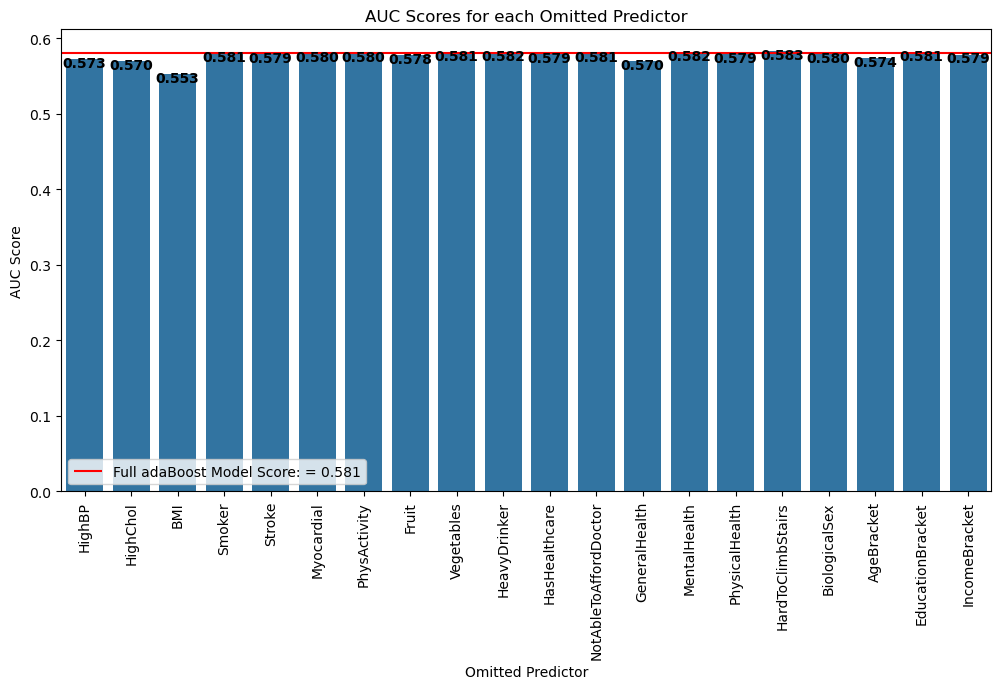

In [177]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('AUC Score')
plt.hlines(y=fullModelScore, xmin = -0.5, xmax = 19.5, color='red', label = ("Full adaBoost Model Score: = {:0.3f}".format(fullModelScore)))
plt.title("AUC Scores for each Omitted Predictor")

ax = sns.barplot(x=list(scoreList.keys()), y=list(scoreList.values()), color='darkblue')

for i, v in enumerate(scoreList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(scoreList)
plt.legend()
plt.show()

In [163]:
accuracyList.pop("Zodiac_2")
accuracyList.pop("Zodiac_3")
accuracyList.pop("Zodiac_4")
accuracyList.pop("Zodiac_5")
accuracyList.pop("Zodiac_6")
accuracyList.pop("Zodiac_7")
accuracyList.pop("Zodiac_8")
accuracyList.pop("Zodiac_9")
accuracyList.pop("Zodiac_10")
accuracyList.pop("Zodiac_11")
accuracyList.pop("Zodiac_12")
print(accuracyList)
minKey = min(accuracyList, key = accuracyList.get)
print(minKey)
print(accuracyList[minKey])

{'HighBP': 0.8629375591296121, 'HighChol': 0.8648494165878272, 'BMI': 0.8612228003784295, 'Smoker': 0.8660911384421318, 'Stroke': 0.8640610217596972, 'Myocardial': 0.8638245033112583, 'PhysActivity': 0.8648494165878272, 'Fruit': 0.864277830337433, 'Vegetables': 0.8637456638284453, 'HeavyDrinker': 0.8655786818038473, 'HasHealthcare': 0.8641792809839167, 'NotAbleToAffordDoctor': 0.8647705771050141, 'GeneralHealth': 0.8656181015452539, 'MentalHealth': 0.8656969410280668, 'PhysicalHealth': 0.8669977924944813, 'HardToClimbStairs': 0.8661896877956481, 'BiologicalSex': 0.8638639230526648, 'AgeBracket': 0.8635682749921161, 'EducationBracket': 0.8636076947335225, 'IncomeBracket': 0.8635288552507095}
BMI
0.8612228003784295


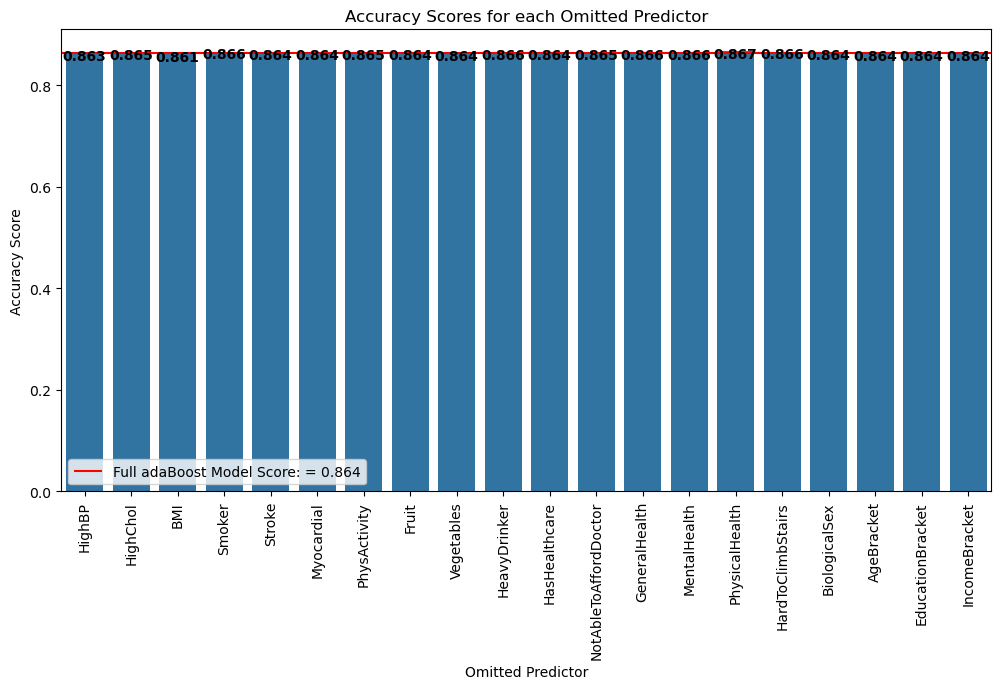

In [171]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('Accuracy Score')
plt.hlines(y=fullModelAccuracy, xmin = -0.5, xmax = 19.5, color='red', label = ("Full adaBoost Model Score: = {:0.3f}".format(fullModelAccuracy)))
plt.title("Accuracy Scores for each Omitted Predictor")

ax = sns.barplot(x=list(accuracyList.keys()), y=list(accuracyList.values()), color='darkblue')

for i, v in enumerate(accuracyList.values()):
    ax.text(i, v - 0.005, f"{v:.3f}", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
sns.barplot(accuracyList)
plt.legend()
plt.show()

## Extra Credit

## b)

In [239]:
df_encoded = pd.get_dummies(df, columns=['Zodiac'], prefix='Zodiac', drop_first=False)

In [241]:

print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_1"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_2"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_3"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_4"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_5"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_6"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_7"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_8"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_9"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_10"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_11"]))
print(df_encoded["Diabetes"].corr(df_encoded["Zodiac_12"]))

0.00036922919949144924
-0.0010643709810342784
-0.0017673905294304138
0.0008722126657475441
0.0016357205156179936
-0.002186646010328372
0.003984100611390078
-0.0007506599995813608
-0.00015300499683813568
0.0013246272495227313
0.00041905628942164345
-0.0026934463215515106
